In [1]:
from IPython.display import display, Image
import pandas
import json
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.width', 1000)


In [2]:

# Use Python's JSON lib, because Pandas doesn't provide
# an option to not cast floats.
# This is a problem when you have discrete categories
# (in this case, severity 1.7) that Pandas introduces
# floating-point drift to.
cves = None
for i in range(2,20):
	path = f'./data/nvdcve-1.1-20{i:02}.json'
	with open(path, 'r') as f:
		print(f'Loading {path} ... ({i-1} of {len(range(2,20))})')
		data = json.load(f)

	if cves is None: cves = pandas.DataFrame(data)
	else: cves = cves.append(pandas.DataFrame(data))
	print(f'Loaded {path}. New shape: {cves.shape}')
# cve20022 = pandas.read_json('./data/nvdcve-1.1-2002.json', dtype=False)
# iseq = cve2002==cve20022
# for col in iseq.columns:
# 	print(iseq[col].value_counts())

# #%%
# a = str(cve2002[cve2002['CVE_Items'] != cve20022['CVE_Items']].iloc[0,5])

# #%%
# b = str(cve20022[cve2002['CVE_Items'] != cve20022['CVE_Items']].iloc[0,5])

# #%%
# a == b
# b
print(cves.shape)
cves.tail(10)



Loading ./data/nvdcve-1.1-2002.json ... (1 of 18)
Loaded ./data/nvdcve-1.1-2002.json. New shape: (6746, 6)
Loading ./data/nvdcve-1.1-2003.json ... (2 of 18)
Loaded ./data/nvdcve-1.1-2003.json. New shape: (8293, 6)
Loading ./data/nvdcve-1.1-2004.json ... (3 of 18)
Loaded ./data/nvdcve-1.1-2004.json. New shape: (10995, 6)
Loading ./data/nvdcve-1.1-2005.json ... (4 of 18)
Loaded ./data/nvdcve-1.1-2005.json. New shape: (15745, 6)
Loading ./data/nvdcve-1.1-2006.json ... (5 of 18)
Loaded ./data/nvdcve-1.1-2006.json. New shape: (22873, 6)
Loading ./data/nvdcve-1.1-2007.json ... (6 of 18)
Loaded ./data/nvdcve-1.1-2007.json. New shape: (29431, 6)
Loading ./data/nvdcve-1.1-2008.json ... (7 of 18)
Loaded ./data/nvdcve-1.1-2008.json. New shape: (36579, 6)
Loading ./data/nvdcve-1.1-2009.json ... (8 of 18)
Loaded ./data/nvdcve-1.1-2009.json. New shape: (41547, 6)
Loading ./data/nvdcve-1.1-2010.json ... (9 of 18)
Loaded ./data/nvdcve-1.1-2010.json. New shape: (46625, 6)
Loading ./data/nvdcve-1.1-2011

,CVE_data_type,CVE_data_format,CVE_data_version,CVE_data_numberOfCVEs,CVE_data_timestamp,CVE_Items
7939,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7940,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7941,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7942,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7943,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7944,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7945,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7946,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7947,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7948,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."


In [3]:
normalized = pandas.io.json.json_normalize(cves['CVE_Items'])
del cves


In [4]:
print(normalized.shape)
normalized.head(10)


(129494, 43)


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ID,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore
0,1999-12-30T05:00Z,2010-12-16T05:00Z,CVE,MITRE,4.0,CVE-1999-0001,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.openbsd.org/errata23.html...,"[{'lang': 'en', 'value': 'ip_input.c in BSD-de...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-10-12T04:00Z,2009-01-26T05:00Z,CVE,MITRE,4.0,CVE-1999-0002,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'ftp://patches.sgi.com/support/free/s...,"[{'lang': 'en', 'value': 'Buffer overflow in N...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:C/I:C/A:C,NETWORK,LOW,NONE,COMPLETE,COMPLETE,COMPLETE,10.0,HIGH,10.0,10.0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-04-01T05:00Z,2018-10-30T16:26Z,CVE,MITRE,4.0,CVE-1999-0003,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'ftp://patches.sgi.com/support/free/s...,"[{'lang': 'en', 'value': 'Execute commands as ...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:C/I:C/A:C,NETWORK,LOW,NONE,COMPLETE,COMPLETE,COMPLETE,10.0,HIGH,10.0,10.0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-12-16T05:00Z,2018-10-12T21:29Z,CVE,MITRE,4.0,CVE-1999-0004,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'https://docs.microsoft.com/en-us/sec...,"[{'lang': 'en', 'value': 'MIME buffer overflow...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-07-20T04:00Z,2008-09-09T12:33Z,CVE,MITRE,4.0,CVE-1999-0005,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://sunsolve.sun.com/pub-cgi/retr...,"[{'lang': 'en', 'value': 'Arbitrary command ex...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:C/I:C/A:C,NETWORK,LOW,NONE,COMPLETE,COMPLETE,COMPLETE,10.0,HIGH,10.0,10.0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998-07-14T04:00Z,2008-09-09T12:33Z,CVE,MITRE,4.0,CVE-1999-0006,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'ftp://patches.sgi

In [5]:
pre_dropped = normalized.copy()

normalized.dropna(subset=['impact.baseMetricV2.cvssV2.version'], inplace=True)


In [6]:
to_drop = ['CVE-2018-10662', 
			'CVE-2018-10658', 
			'CVE-2018-10659',
			'CVE-2018-10661',
			'CVE-2018-10664',
			'CVE-2018-10663',
			'CVE-2018-10660']
for cve in to_drop:
	print(normalized[normalized['cve.CVE_data_meta.ID']==cve]['configurations.nodes'].iloc[0])
	normalized = normalized[normalized['cve.CVE_data_meta.ID']!=cve]


[{'operator': 'AND', 'children': [{'operator': 'OR', 'cpe_match': [{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:o:axis:a1001_firmware:*:*:*:*:*:*:*:*', 'versionEndExcluding': '1.65.1'}]}, {'operator': 'OR', 'cpe_match': [{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:h:axis:a1001:-:*:*:*:*:*:*:*'}]}]}, {'operator': 'AND', 'children': [{'operator': 'OR', 'cpe_match': [{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:o:axis:a8004-v_firmware:*:*:*:*:*:*:*:*', 'versionEndExcluding': '1.65.2'}]}, {'operator': 'OR', 'cpe_match': [{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:h:axis:a8004-v:-:*:*:*:*:*:*:*'}]}]}, {'operator': 'AND', 'children': [{'operator': 'OR', 'cpe_match': [{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:o:axis:a8105-e_firmware:*:*:*:*:*:*:*:*', 'versionEndExcluding': '1.65.2'}]}, {'operator': 'OR', 'cpe_match': [{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:h:axis:a8105-e:-:*:*:*:*:*:*:*'}]}]}, {'operator': 'AND', 'children': [{'operator': 'OR', 'cpe_match': [{'vulnerable': True, 'cpe23Uri': 'cpe

In [7]:
normalized.isna().sum()


publishedDate                                           0
lastModifiedDate                                        0
cve.data_type                                           0
cve.data_format                                         0
cve.data_version                                        0
cve.CVE_data_meta.ID                                    0
cve.CVE_data_meta.ASSIGNER                              0
cve.problemtype.problemtype_data                        0
cve.references.reference_data                           0
cve.description.description_data                        0
configurations.CVE_data_version                         0
configurations.nodes                                    0
impact.baseMetricV2.cvssV2.version                      0
impact.baseMetricV2.cvssV2.vectorString                 0
impact.baseMetricV2.cvssV2.accessVector                 0
impact.baseMetricV2.cvssV2.accessComplexity             0
impact.baseMetricV2.cvssV2.authentication               0
impact.baseMet

In [8]:
normalized['configurations.nodes'].head(20)


0     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
1     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
2     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
3     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
4     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
5     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
6     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
7     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
8     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
9     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
10    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
11    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
12    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
13    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
14    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
15    [{'operator': 'AND', 'children': [{'operator':...
16    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
17    [{'operator': 'OR', 'cpe_match': [{'vulner

In [9]:
normalized['cve.CVE_data_meta.ID'].tail()


129489    CVE-2019-9974
129490    CVE-2019-9975
129491    CVE-2019-9976
129492    CVE-2019-9977
129493    CVE-2019-9978
Name: cve.CVE_data_meta.ID, dtype: object

In [10]:

# print(normalized['configurations.nodes'][0][0])
# df = pandas.io.json.json_normalize(normalized['configurations.nodes'][0][0]['cpe_match'])
df_1 = normalized.explode('configurations.nodes')
del normalized
def get_from_key(d, key=None, default=None):
	if not isinstance(d, dict):
		return(d)
	return(d.get(key, default))
def get_modified(d, key='cpe_match', child_key='children', default=None):
	if not isinstance(d, dict):
		return(d)
	if key in d:
		return(d.get(key, default))
	elif child_key in d:
		if isinstance(d[child_key], dict):
			return(get_from_key(d, key=key, default=default))
		elif isinstance(d[child_key], list):
			ret = []
			for val in d[child_key]:
				v = get_from_key(val, key=key, default=default)
				if isinstance(v, list):
					ret += v
				else:
					ret.append(v)
			return(ret)
		else:
			return(d[child_key])
df_1['cpe_match'] = df_1['configurations.nodes'].apply(get_modified)

df_1.drop(columns=['configurations.nodes'], inplace=True)


In [11]:
# a = {'operator': 'AND',
#  'children': [{'operator': 'OR',
#    'cpe_match': [{'vulnerable': True,
#      'cpe23Uri': 'cpe:2.3:o:cisco:ios:7000:*:*:*:*:*:*:*'}]},
#   {'operator': 'OR',
#    'cpe_match': [{'vulnerable': True,
#      'cpe23Uri': 'cpe:2.3:a:gnu:inet:5.01:*:*:*:*:*:*:*'},
#     {'vulnerable': True,
#      'cpe23Uri': 'cpe:2.3:a:microsoft:winsock:2.0:*:*:*:*:*:*:*'}]}]}

# b = []
# b+=get_from_key(a['children'][0],key='cpe_match')
# b


In [12]:
df = df_1.explode('cpe_match')
del df_1
df['cpe23Uri'] = df['cpe_match'].apply(get_from_key, key='cpe23Uri')
df['vulnerable'] = df['cpe_match'].apply(get_from_key, key='vulnerable')


In [13]:
print(df.shape)
df.tail(20)


(7056861, 45)


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ID,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable
129484,2019-03-24T02:29Z,2019-03-25T18:23Z,CVE,MITRE,4.0,CVE-2019-9966,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code610.blogspot.com/2019/03...,"[{'lang': 'en', 'value': 'XnView Classic 2.48 ...",4.0,2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,False,False,True,False,3.0,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:xn...",cpe:2.3:a:xnview:xnview_classic:2.48:*:*:*:*:*...,True
129484,2019-03-24T02:29Z,2019-03-25T18:23Z,CVE,MITRE,4.0,CVE-2019-9966,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code610.blogspot.com/2019/03...,"[{'lang': 'en', 'value': 'XnView Classic 2.48 ...",4.0,2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,False,False,True,False,3.0,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9,"{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:o:m...",cpe:2.3:o:microsoft:windows:-:*:*:*:*:*:*:*,False
129485,2019-03-24T02:29Z,2019-03-25T18:27Z,CVE,MITRE,4.0,CVE-2019-9967,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code610.blogspot.com/2019/03...,"[{'lang': 'en', 'value': 'XnView Classic 2.48 ...",4.0,2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,False,False,True,False,3.0,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:xn...",cpe:2.3:a:xnview:xnview_classic:2.48:*:*:*:*:*...,True
129485,2019-03-24T02:29Z,2019-03-25T18:27Z,CVE,MITRE,4.0,CVE-2019-9967,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code610.blogspot.com/2019/03...,"[{'lang': 'en', 'value': 'XnView Classic 2.48 ...",4.0,2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,False,False,True,False,3.0,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9,"{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:o:m...",cpe:2.3:o:microsoft:windows:-:*:*:*:*:*:*:*,False
129486,2019-03-24T02:29Z,2019-03-25T18:27Z,CVE,MITRE,4.0,CVE-2019-9968,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE

In [14]:
# df['cpe23Uri'].str.count(':').value_counts()
# No escaped colons, despite them being legal in CPE 2.3 URIs
# see https://nvlpubs.nist.gov/nistpubs/Legacy/IR/nistir7695.pdf
# Thank goodness, that simplifies things greatly
#
# Scratch that prior note. See regex below.
# 


In [15]:
# def get_vendor(s):
# 	if not isinstance(s, str): return(s)
# 	return(s.split(':')[3])
# def get_product(s):
# 	if not isinstance(s, str): return(s)
# 	return(s.split(':')[4])
# df['vendor'] = df['cpe23Uri'].apply(get_vendor)
# df['product'] = df['cpe23Uri'].apply(get_product)
vp = df['cpe23Uri'].str.extract(r'(?P<cpe_version>cpe:2\.3:)(?P<part>[aho])(?P<vendor>(?::(?:[a-zA-Z0-9!"#$%&\'()*+,\\\-_.\/;<=>?@\[\]^`{|}~]|\\:)+))(?P<product>(?::(?:[a-zA-Z0-9!"#$%&\'()*+,\\\-_.\/;<=>?@\[\]^`{|}~]|\\:)+))(?P<additional_fields>(?::(?:[a-zA-Z0-9!"#$%&\'()*+,\\\-_.\/;<=>?@\[\]^`{|}~]|\\:)+){8})$', expand=True)

for column in vp.columns:
	df[column] = vp[column]

del vp


In [16]:
df['vendor'].isna().sum()



152

In [17]:
df['vendor'].value_counts()


:google                                    730276
:qualcomm                                  726162
:hp                                        695398
:mozilla                                   584927
:linux                                     306798
                                            ...  
:contractorscripts                              1
:realestate_crowdfunding_script_project         1
:minishowcase                                   1
:sumome                                         1
:mavenhut                                       1
Name: vendor, Length: 20995, dtype: int64

In [18]:
df[df['vendor']==':aol'].groupby('cve.CVE_data_meta.ID').first()

# #%%
# df[df.isna()['cpe_match']==True].head(1).loc[15,'configurations.nodes']
# #%%
# df[df.isna()['cpe_match']==True].head().iloc[1].loc['configurations.nodes']


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-1999-0486,1998-02-01T05:00Z,2008-09-09T12:34Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[],"[{'lang': 'en', 'value': 'Denial of service in...",4.0,2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ao...",cpe:2.3:a:aol:instant_messenger:3.5:*:*:*:*:*:*:*,True,cpe:2.3:,a,:aol,:instant_messenger,:3.5:*:*:*:*:*:*:*
CVE-2000-0190,2000-03-02T05:00Z,2008-09-10T19:03Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://archives.neohapsis.com/archiv...,"[{'lang': 'en', 'value': 'AOL Instant Messenge...",4.0,2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ao...",cpe:2.3:a:aol:instant_messenger:*:*:*:*:*:*:*:*,True,cpe:2.3:,a,:aol,:instant_messenger,:*:*:*:*:*:*:*:*
CVE-2000-0383,2000-05-08T04:00Z,2008-09-10T19:04Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.securityfocus.com/bid/118...,"[{'lang': 'en', 'value': 'The file transfer co...",4.0,2.0,AV:N/AC:L/Au:N/C:N/I:P/A:N,NETWORK,LOW,NONE,NONE,PARTIAL,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ao...",cpe:2.3:a:aol:instant_messenger:4.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:aol,:instant_messenger,:4.0:*:*:*:*:*:*:*
CVE-2000-1000,2000-12-11T05:00Z,2017-10-10T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.securityfocus.com/archive...,"[{'lang': 'en', 'value': 'Format string vulner...",4.0,2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ao...",cpe:2.3:a:aol:instant_messenger:4.1.2010:*:*:*...,True,cpe:2.3:,a,:aol,:instant_messenger,:4.1.2010:*:*:*:*:*:*:*
CVE-2000-1093,2001-01-09T05:00Z,2017-07-11T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.at

In [19]:
print(df.shape)
df['vendor'].isna().sum()


(7056861, 50)


152

In [20]:

# df[df['cpe23Uri'].str.find('\\\\')>-1]


In [21]:
# vp.head(10)


In [22]:
print(df.shape)
# print(vp.shape)


(7056861, 50)


In [23]:
df[df['vendor']==':axis'].loc[107647,'configurations.nodes'].iloc[-15]
# 2129786
# https://blog.vdoo.com/2018/06/18/vdoo-discovers-significant-vulnerabilities-in-axis-cameras/


KeyError: 107647

In [24]:
#
#
# df[df['publishedDate']=='2018-06-26T18:29Z']['vendor'].value_counts()
# :axis       2129400
# :siemens         54
# :redhat           2
# :ovirt            2
# Name: vendor, dtype: int64
#
#
# df[df['publishedDate']=='2018-06-26T18:29Z']['cve.CVE_data_meta.ID'].value_counts()
# CVE-2018-10662    304200
# CVE-2018-10658    304200
# CVE-2018-10659    304200
# CVE-2018-10661    304200
# CVE-2018-10664    304200
# CVE-2018-10663    304200
# CVE-2018-10660    304200
# CVE-2018-4846         21
# CVE-2018-4845         21
# CVE-2018-1072          4
# CVE-2018-11447         2
# CVE-2018-11448         2
# CVE-2018-4860          2
# CVE-2018-4861          2
# CVE-2018-4859          2
# CVE-2018-11449         2
# Name: cve.CVE_data_meta.ID, dtype: int64


In [25]:
# df[df['publishedDate']=='2018-06-26T18:29Z'].loc['CVE-2018-10660','cve.CVE_data_meta.ID'].value_counts()


In [26]:
#qualcomm
#mozilla
#apple
#microsoft
#
chrome_points_awry, [] = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()

chrome_points = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


ValueError: too many values to unpack (expected 2)

In [27]:
# publishedDate has the wrong data for Firefox
# so we use the year in the CVE ID instead
# Then do the same for other browsers for consistency's sake
# it makes more sense anywho, as the publication date can vary wildly
# depending on notice given etc.
firefox_points = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

firefox_points_awry, [] = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
#.str[4:9].value_counts()


ValueError: too many values to unpack (expected 2)

In [28]:
firefox_points

2002      2
2003      1
2004     20
2005     75
2006    104
2007     78
2008     94
2009    128
2010    104
2011    101
2012    159
2013    150
2014    117
2015    171
2016    176
2017    186
2018    145
2019     67
Name: cve.CVE_data_meta.ID, dtype: int64

In [29]:
firefox_points_awry, []


NameError: name 'firefox_points_awry' is not defined

In [30]:
safari_points_awry, [] = df[(df['product']==':safari') & (df['vendor']==':apple') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
safari_points = df[(df['product']==':safari') & (df['vendor']==':apple') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


ValueError: too many values to unpack (expected 2)

In [31]:
# ie_points


In [32]:
# df[(df['product']==':edge') & (df['vendor']==':microsoft')].groupby('cve.CVE_data_meta.ID').first()

In [33]:
ie_points_awry, [] = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

ValueError: too many values to unpack (expected 2)

In [34]:
edge_points_awry, [] = df[(df['product']==':edge') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
edge_points = df[(df['product']==':edge') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


ValueError: too many values to unpack (expected 2)

In [35]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'white', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

browser_ys['Firefox'][1]


NameError: name 'chrome_points' is not defined

In [36]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


NameError: name 'browser_ys' is not defined

In [37]:
# df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()


In [38]:
# import matplotlib.pyplot as pyplot
# pyplot.


In [40]:
#qualcomm
#mozilla
#apple
#microsoft
#
chrome_points_awry = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()

chrome_points = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [41]:
# publishedDate has the wrong data for Firefox
# so we use the year in the CVE ID instead
# Then do the same for other browsers for consistency's sake
# it makes more sense anywho, as the publication date can vary wildly
# depending on notice given etc.
firefox_points = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

firefox_points_awry = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
#.str[4:9].value_counts()


In [42]:
firefox_points

2002      2
2003      1
2004     20
2005     75
2006    104
2007     78
2008     94
2009    128
2010    104
2011    101
2012    159
2013    150
2014    117
2015    171
2016    176
2017    186
2018    145
2019     67
Name: cve.CVE_data_meta.ID, dtype: int64

In [43]:
firefox_points_awry, []


(2003      1
 2004     20
 2005     75
 2006    103
 2007     77
 2008     92
 2009    126
 2010    107
 2011    101
 2012    163
 2013    149
 2014    108
 2015    179
 2016    133
 2017      1
 2018    334
 2019    109
 Name: publishedDate, dtype: int64, [])

In [44]:
safari_points_awry = df[(df['product']==':safari') & (df['vendor']==':apple') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
safari_points = df[(df['product']==':safari') & (df['vendor']==':apple') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [45]:
# ie_points


In [46]:
# df[(df['product']==':edge') & (df['vendor']==':microsoft')].groupby('cve.CVE_data_meta.ID').first()

In [47]:
ie_points_awry = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

In [48]:
edge_points_awry = df[(df['product']==':edge') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
edge_points = df[(df['product']==':edge') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [49]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'white', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

browser_ys['Firefox'][1]


[0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 20,
 75,
 104,
 78,
 94,
 128,
 104,
 101,
 159,
 150,
 117,
 171,
 176,
 186,
 145,
 67]

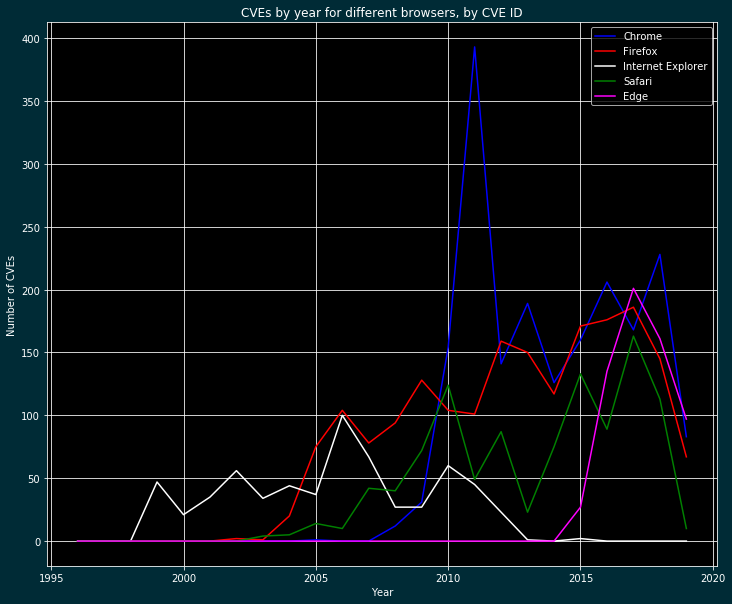

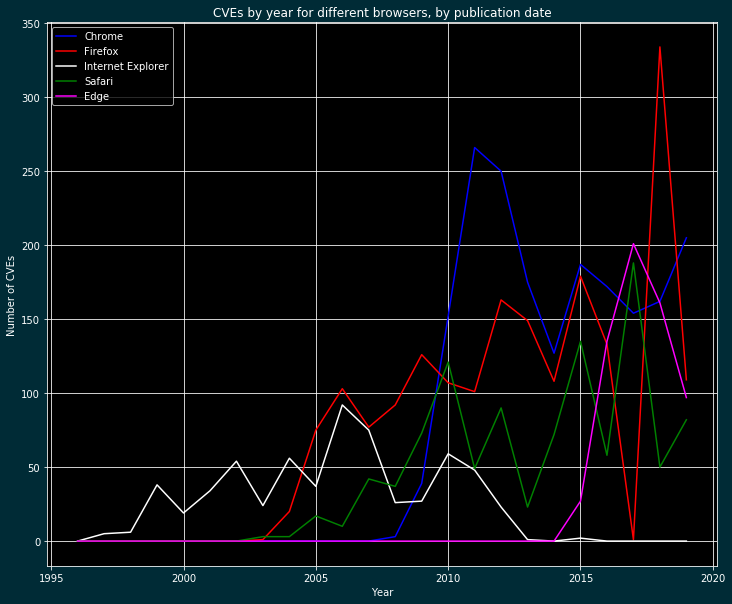

In [50]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


In [51]:
ie2_points_awry = df[(df['product']==':internet_explorer') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie2_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

print(ie_points)
ie_points = ie_points+ie2_points
print(ie_points)

1999     47
2000     21
2001     35
2002     56
2003     34
2004     44
2005     37
2006    100
2007     67
2008     27
2009     27
2010     60
2011     45
2012     23
2013      1
2015      2
Name: cve.CVE_data_meta.ID, dtype: int64
1999     94
2000     42
2001     70
2002    112
2003     68
2004     88
2005     74
2006    200
2007    134
2008     54
2009     54
2010    120
2011     90
2012     46
2013      2
2015      4
Name: cve.CVE_data_meta.ID, dtype: int64


In [52]:

print(ie2_points)

1999     47
2000     21
2001     35
2002     56
2003     34
2004     44
2005     37
2006    100
2007     67
2008     27
2009     27
2010     60
2011     45
2012     23
2013      1
2015      2
Name: cve.CVE_data_meta.ID, dtype: int64


In [53]:
ie_points_awry = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [54]:
ie2_points_awry = df[(df['product']==':internet_explorer') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie2_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

print(ie_points)
ie_points = ie_points+ie2_points
print(ie_points)


1999     47
2000     21
2001     35
2002     56
2003     34
2004     44
2005     37
2006    100
2007     67
2008     27
2009     27
2010     60
2011     45
2012     23
2013      1
2015      2
Name: cve.CVE_data_meta.ID, dtype: int64
1999     94
2000     42
2001     70
2002    112
2003     68
2004     88
2005     74
2006    200
2007    134
2008     54
2009     54
2010    120
2011     90
2012     46
2013      2
2015      4
Name: cve.CVE_data_meta.ID, dtype: int64


In [55]:
ie_points_awry = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [56]:
ie2_points_awry = df[(df['product']==':internet_explorer') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie2_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

print(ie_points == ie2_points)
# ie_points = ie_points+ie2_points
print(ie_points)


1999    True
2000    True
2001    True
2002    True
2003    True
2004    True
2005    True
2006    True
2007    True
2008    True
2009    True
2010    True
2011    True
2012    True
2013    True
2015    True
Name: cve.CVE_data_meta.ID, dtype: bool
1999     47
2000     21
2001     35
2002     56
2003     34
2004     44
2005     37
2006    100
2007     67
2008     27
2009     27
2010     60
2011     45
2012     23
2013      1
2015      2
Name: cve.CVE_data_meta.ID, dtype: int64


In [57]:
ie2_points_awry = df[(df['product']==':internet_explorer') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie2_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

print(ie_points_awry == ie2_points_awry)
# ie_points = ie_points+ie2_points
print(ie_points)


ValueError: Can only compare identically-labeled Series objects

In [58]:
ie2_points_awry = df[(df['product']==':internet_explorer') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie2_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

print(ie_points_awry)
# ie_points = ie_points+ie2_points
print(ie2_points_awry)


1997     5
1998     6
1999    38
2000    19
2001    34
2002    54
2003    24
2004    56
2005    37
2006    92
2007    75
2008    26
2009    27
2010    59
2011    48
2012    23
2013     1
2015     2
Name: publishedDate, dtype: int64
2000      1
2007      2
2008     38
2009     32
2010      1
2012     18
2013    128
2014    243
2015    231
2016    129
2017     79
2018     75
2019     47
Name: publishedDate, dtype: int64


In [59]:
print(ie_points_awry)
# ie_points = ie_points+ie2_points
print(ie2_points_awry)
print(ie2_points_awry+ie_points_awry)


1997     5
1998     6
1999    38
2000    19
2001    34
2002    54
2003    24
2004    56
2005    37
2006    92
2007    75
2008    26
2009    27
2010    59
2011    48
2012    23
2013     1
2015     2
Name: publishedDate, dtype: int64
2000      1
2007      2
2008     38
2009     32
2010      1
2012     18
2013    128
2014    243
2015    231
2016    129
2017     79
2018     75
2019     47
Name: publishedDate, dtype: int64
1997      NaN
1998      NaN
1999      NaN
2000     20.0
2001      NaN
2002      NaN
2003      NaN
2004      NaN
2005      NaN
2006      NaN
2007     77.0
2008     64.0
2009     59.0
2010     60.0
2011      NaN
2012     41.0
2013    129.0
2014      NaN
2015    233.0
2016      NaN
2017      NaN
2018      NaN
2019      NaN
Name: publishedDate, dtype: float64


In [60]:
print(ie_points_awry)
# ie_points = ie_points+ie2_points
print(ie2_points_awry)
for year range(1996, 2020):
	if year in ie2_points_awry:
		if year in ie_points_awry:
			ie_points_awry[year] = ie_points_awry[year]+ie2_points_awry[year]
		else:
			ie_points_awry[year] = ie2_points_awry[year]


print(ie_points_awry)
# ie_points = ie_points+ie2_points
print(ie2_points_awry)


SyntaxError: invalid syntax (<ipython-input-63-bc9fd12ecde4>, line 5)

In [61]:
print(ie_points_awry)
# ie_points = ie_points+ie2_points
print(ie2_points_awry)
for year in range(1996, 2020):
	if year in ie2_points_awry:
		if year in ie_points_awry:
			ie_points_awry[year] = ie_points_awry[year]+ie2_points_awry[year]
		else:
			ie_points_awry[year] = ie2_points_awry[year]


print(ie_points_awry)
# ie_points = ie_points+ie2_points
print(ie2_points_awry)


1997     5
1998     6
1999    38
2000    19
2001    34
2002    54
2003    24
2004    56
2005    37
2006    92
2007    75
2008    26
2009    27
2010    59
2011    48
2012    23
2013     1
2015     2
Name: publishedDate, dtype: int64
2000      1
2007      2
2008     38
2009     32
2010      1
2012     18
2013    128
2014    243
2015    231
2016    129
2017     79
2018     75
2019     47
Name: publishedDate, dtype: int64
1997     5
1998     6
1999    38
2000    19
2001    34
2002    54
2003    24
2004    56
2005    37
2006    92
2007    75
2008    26
2009    27
2010    59
2011    48
2012    23
2013     1
2015     2
Name: publishedDate, dtype: int64
2000      1
2007      2
2008     38
2009     32
2010      1
2012     18
2013    128
2014    243
2015    231
2016    129
2017     79
2018     75
2019     47
Name: publishedDate, dtype: int64


In [62]:
ie_points_awry = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [63]:
ie2_points_awry = df[(df['product']==':internet_explorer') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie2_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()



In [64]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'white', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

i=0
for year in years:
	i+=1
	if str(year) in ie2_points_awry[str(year)]:
		browser_ys['Internet Explorer'][i] += ie2_points_awry[str(year)]

browser_ys['Firefox'][1]


KeyError: '1996'

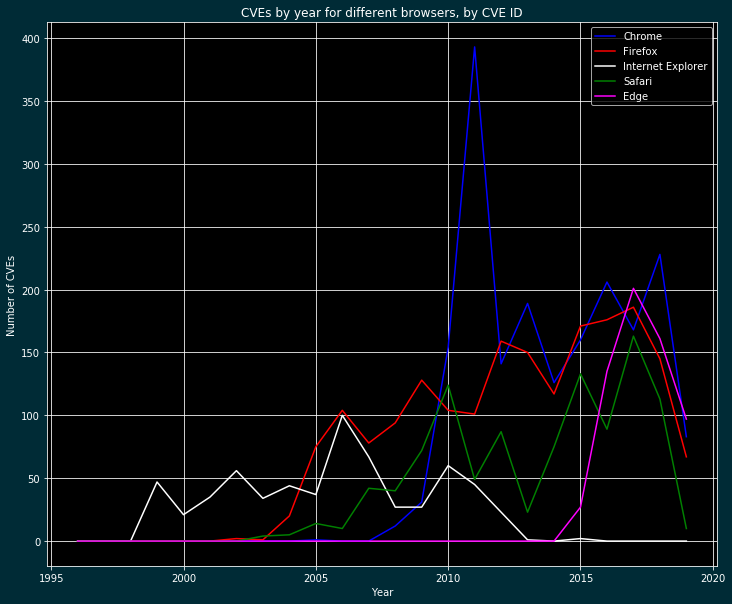

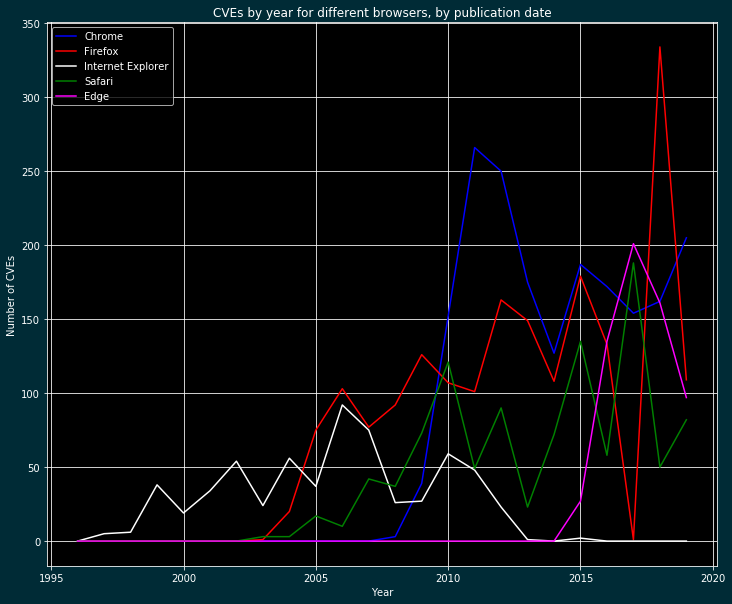

In [65]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


In [66]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'white', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

i=0
for year in years:
	i+=1
	if str(year) in ie2_points_awry:
		browser_ys['Internet Explorer'][i] += ie2_points_awry[str(year)]

browser_ys['Firefox'][1]


IndexError: list index out of range

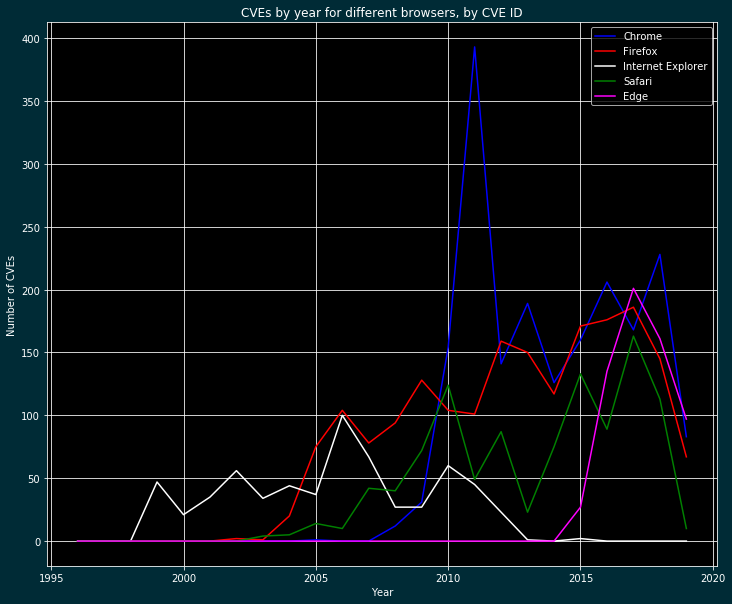

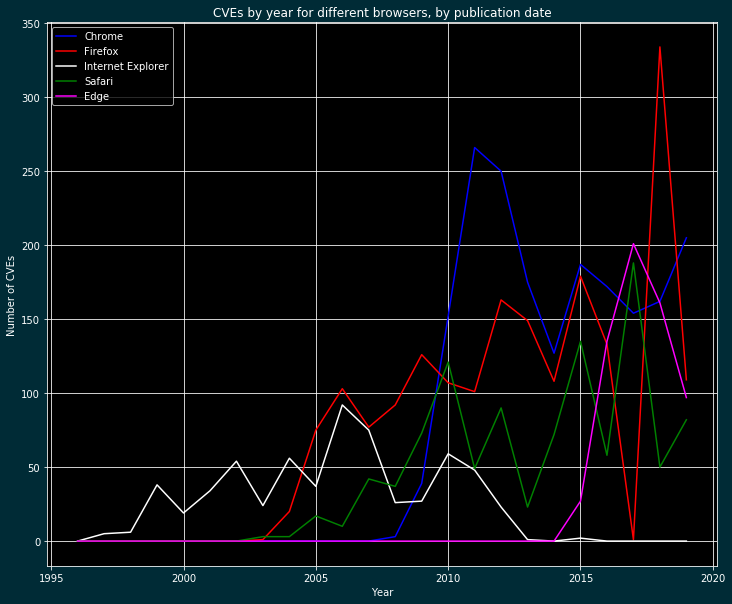

In [67]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


In [68]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'white', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

i=0
for year in years:
	if str(year) in ie2_points_awry:
		browser_ys['Internet Explorer'][i] += ie2_points_awry[str(year)]
	i+=1

browser_ys['Firefox'][1]


IndexError: list index out of range

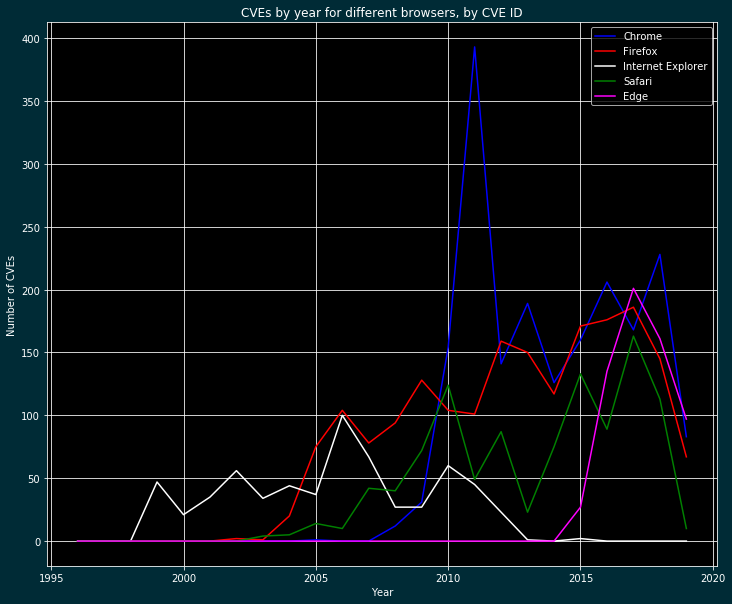

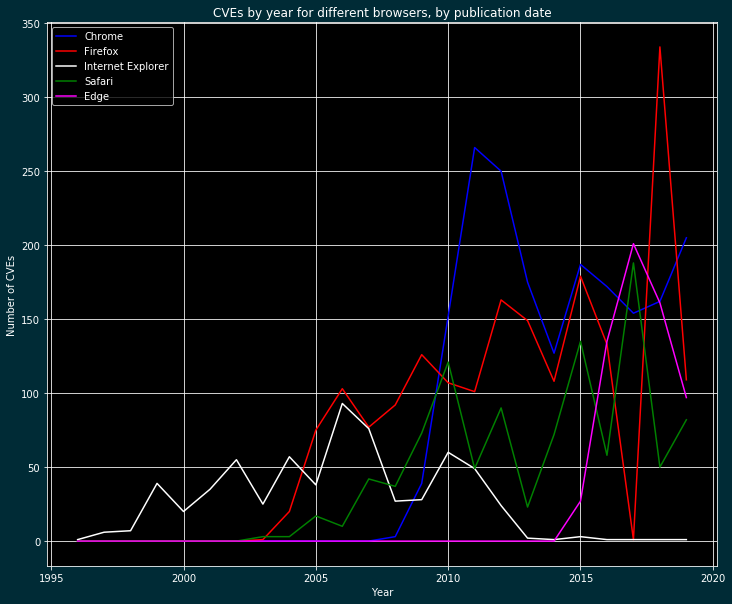

In [69]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


In [70]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'white', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

i=0
print(len(years))
for year in years:

	print(i)
	if str(year) in ie2_points_awry:
		browser_ys['Internet Explorer'][i] += ie2_points_awry[str(year)]
	i+=1

browser_ys['Firefox'][1]


24
0
1
2
3
4
5
6
7
8
9
10
11


IndexError: list index out of range

In [71]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'white', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

i=0
print(len(years))
for year in years:

	print(i)
	if str(year) in ie2_points_awry:
		browser_ys['Internet Explorer'][4][i] += ie2_points_awry[str(year)]
	i+=1

browser_ys['Firefox'][1]


24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


[0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 20,
 75,
 104,
 78,
 94,
 128,
 104,
 101,
 159,
 150,
 117,
 171,
 176,
 186,
 145,
 67]

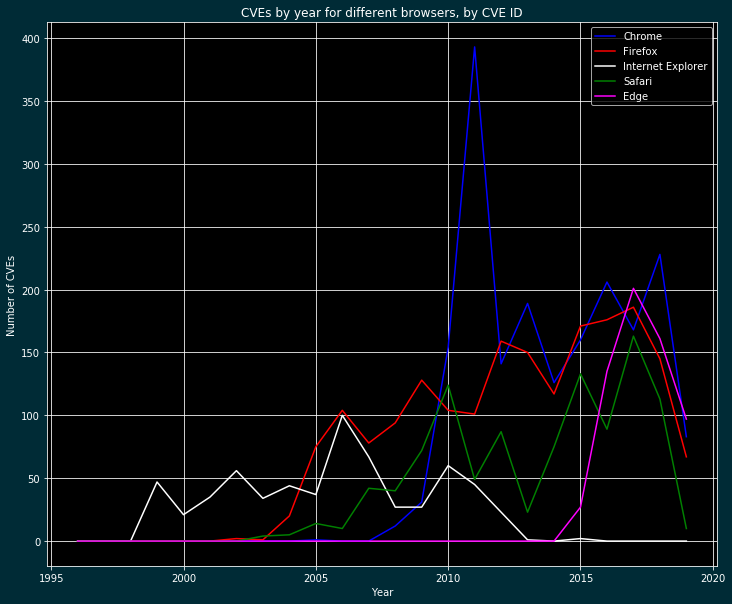

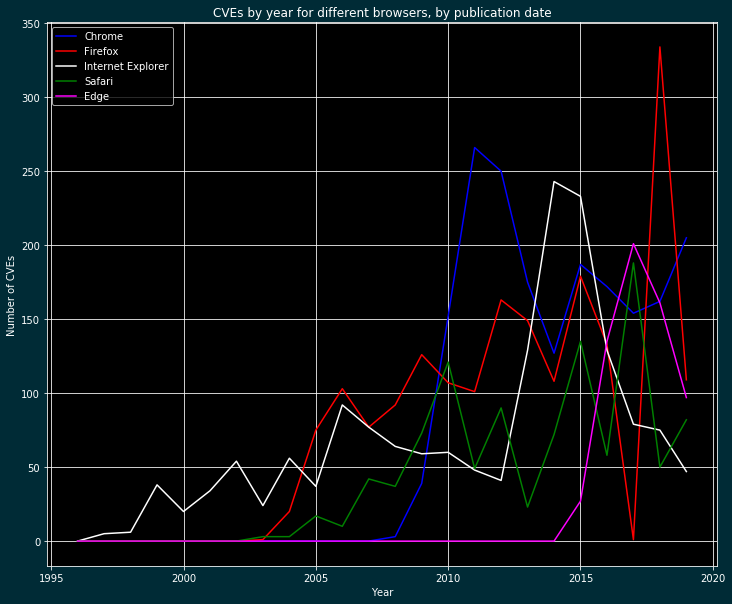

In [72]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


In [73]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = 'transparent'
pyplot.rcParams['axes.facecolor'] = 'transparent'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


ValueError: Key figure.facecolor: transparent does not look like a color arg

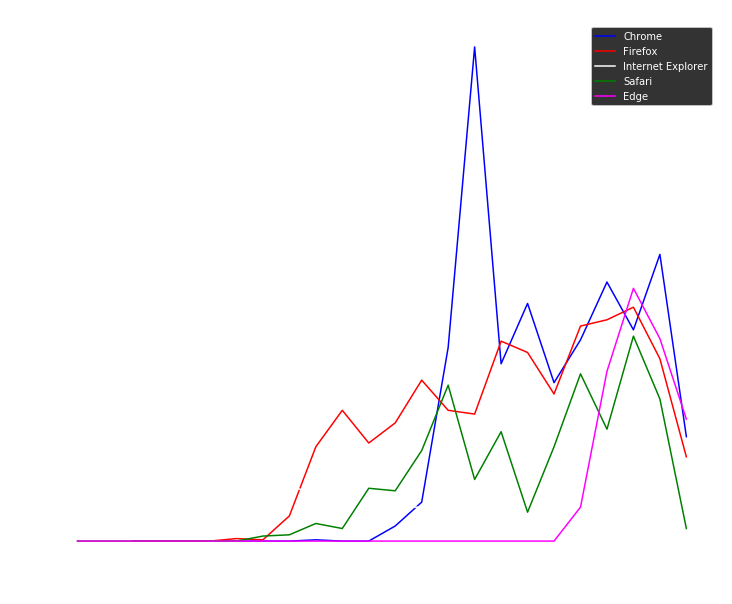

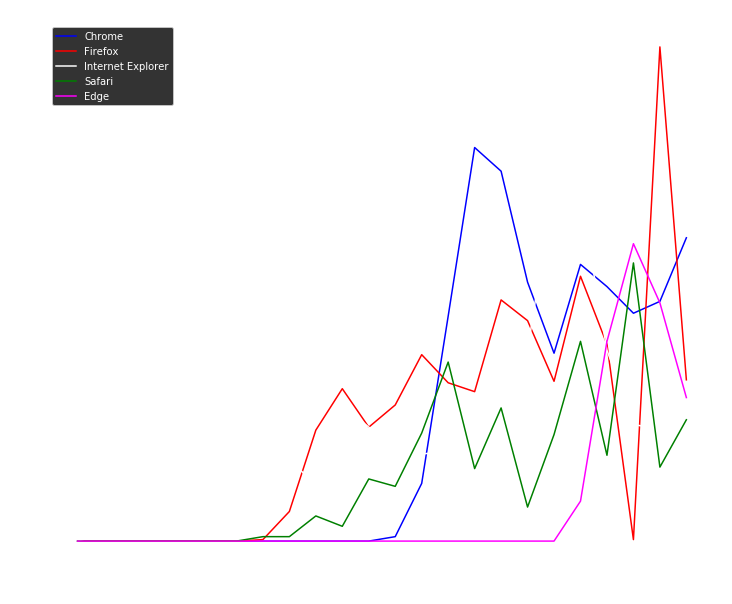

In [74]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B3600'
pyplot.rcParams['axes.facecolor'] = '#00000000'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


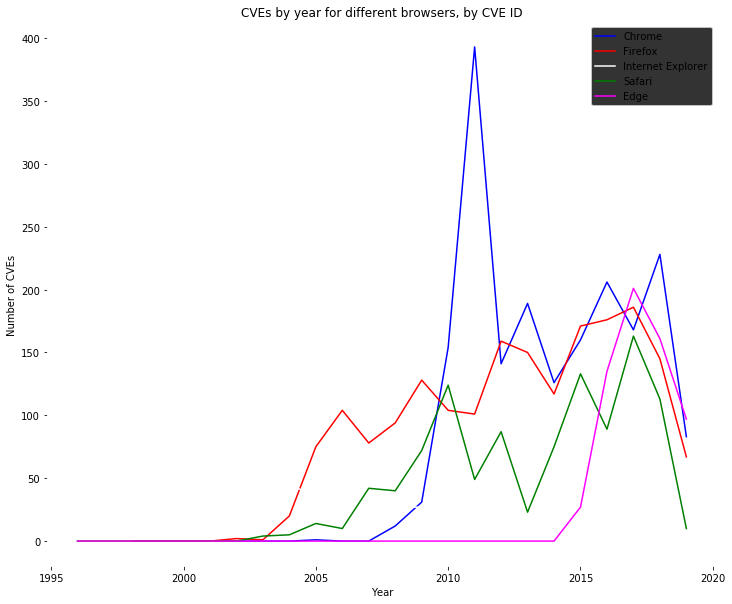

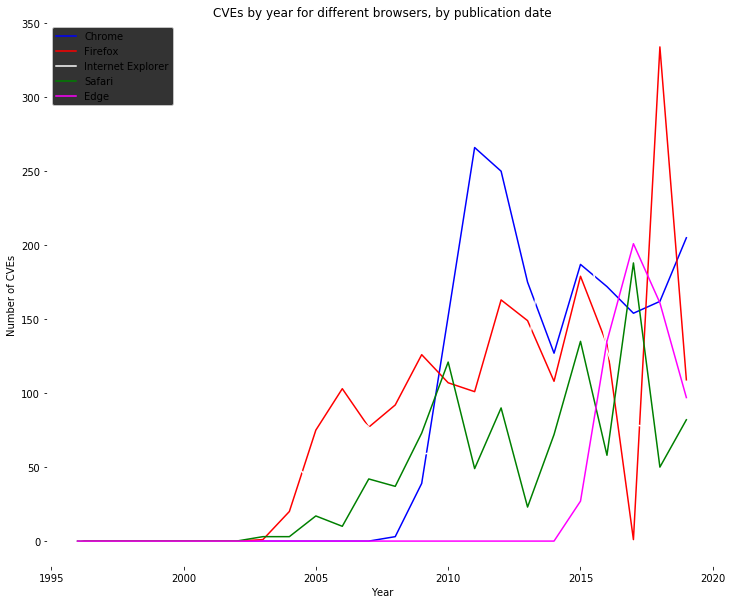

In [75]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B3600'
pyplot.rcParams['axes.facecolor'] = '#00000000'
COLOR = 'black'
pyplot.rcParams['text.color'] = COLOR
pyplot.rcParams['axes.labelcolor'] = COLOR
pyplot.rcParams['xtick.color'] = COLOR
pyplot.rcParams['ytick.color'] = COLOR

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


In [76]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'black', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

i=0
print(len(years))
for year in years:

	print(i)
	if str(year) in ie2_points_awry:
		browser_ys['Internet Explorer'][4][i] += ie2_points_awry[str(year)]
	i+=1

browser_ys['Firefox'][1]


24
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


[0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 20,
 75,
 104,
 78,
 94,
 128,
 104,
 101,
 159,
 150,
 117,
 171,
 176,
 186,
 145,
 67]

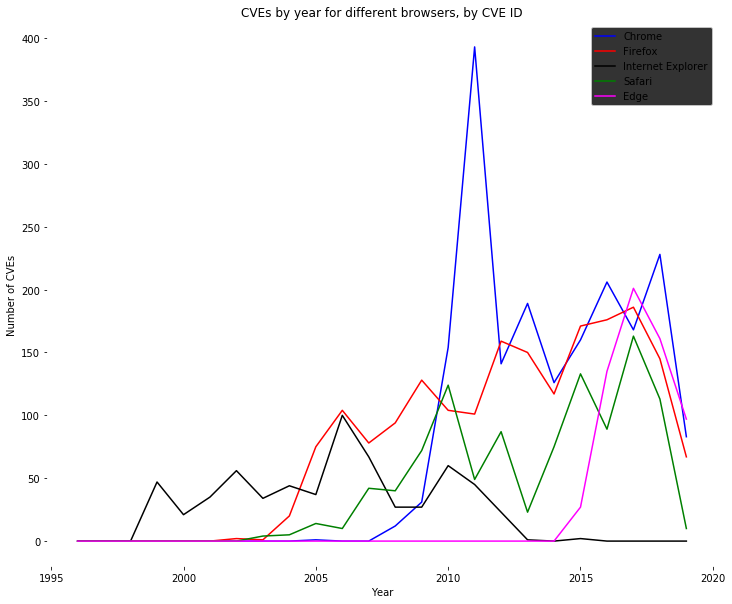

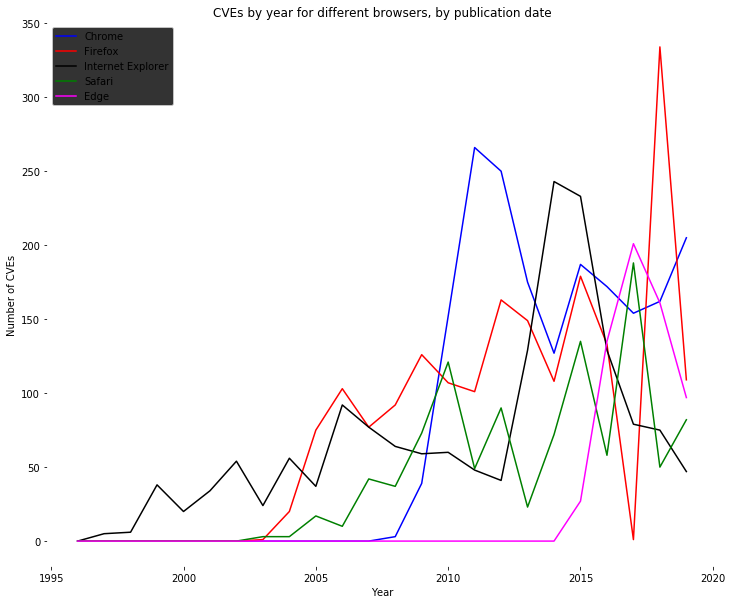

In [77]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B3600'
pyplot.rcParams['axes.facecolor'] = '#00000000'
COLOR = 'black'
pyplot.rcParams['text.color'] = COLOR
pyplot.rcParams['axes.labelcolor'] = COLOR
pyplot.rcParams['xtick.color'] = COLOR
pyplot.rcParams['ytick.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


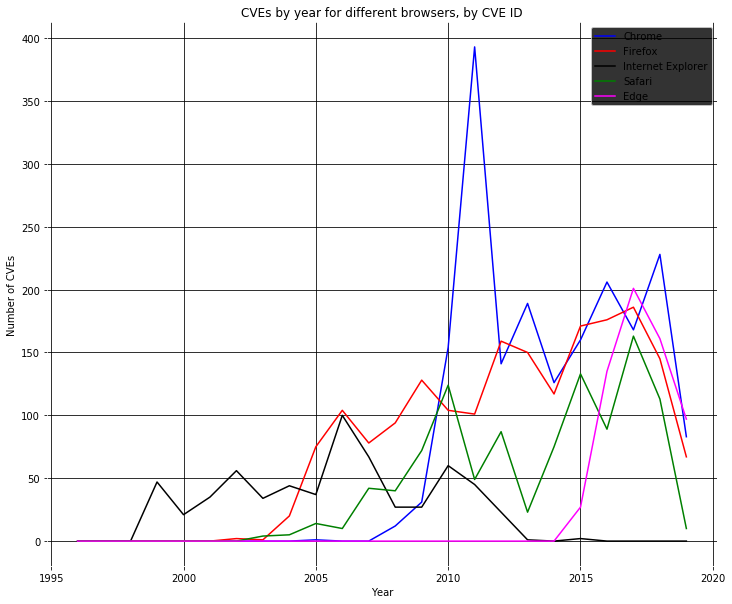

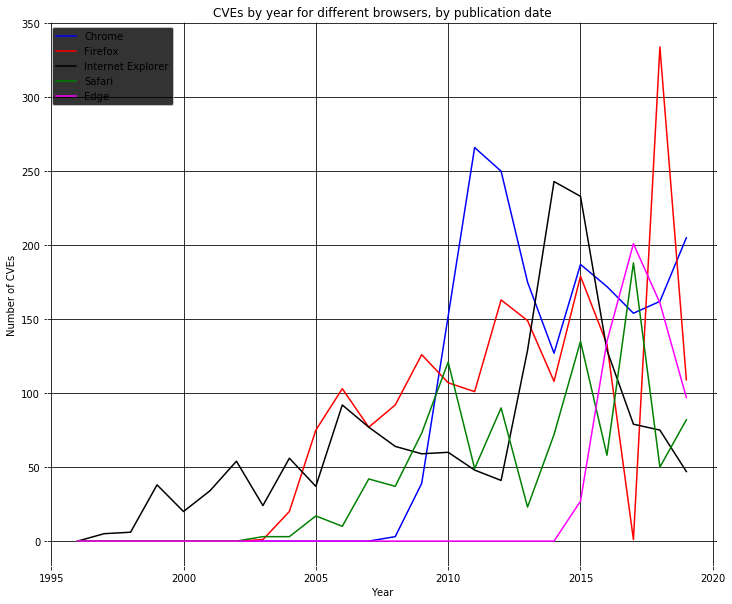

In [78]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B3600'
pyplot.rcParams['axes.facecolor'] = '#00000000'
COLOR = 'black'
pyplot.rcParams['text.color'] = COLOR
pyplot.rcParams['axes.labelcolor'] = COLOR
pyplot.rcParams['xtick.color'] = COLOR
pyplot.rcParams['ytick.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR
pyplot.rcParams['grid.color'] = COLOR

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


In [79]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B3600'
pyplot.rcParams['axes.facecolor'] = '#00000000'
COLOR = 'black'
pyplot.rcParams['text.color'] = COLOR
pyplot.rcParams['axes.labelcolor'] = COLOR
pyplot.rcParams['xtick.color'] = COLOR
pyplot.rcParams['ytick.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR
pyplot.rcParams['grid.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR
pyplot.rcParams['spines.color'] = COLOR

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


KeyError: 'spines.color is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

In [80]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B3600'
pyplot.rcParams['axes.facecolor'] = '#00000000'
COLOR = 'black'
pyplot.rcParams['text.color'] = COLOR
pyplot.rcParams['axes.labelcolor'] = COLOR
pyplot.rcParams['xtick.color'] = COLOR
pyplot.rcParams['ytick.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR
pyplot.rcParams['grid.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR
pyplot.rcParams['spine.color'] = COLOR

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


KeyError: 'spine.color is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

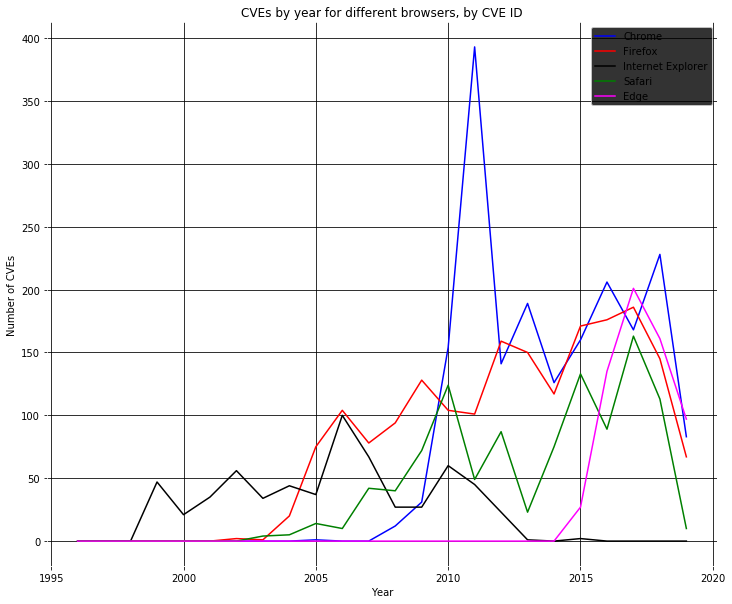

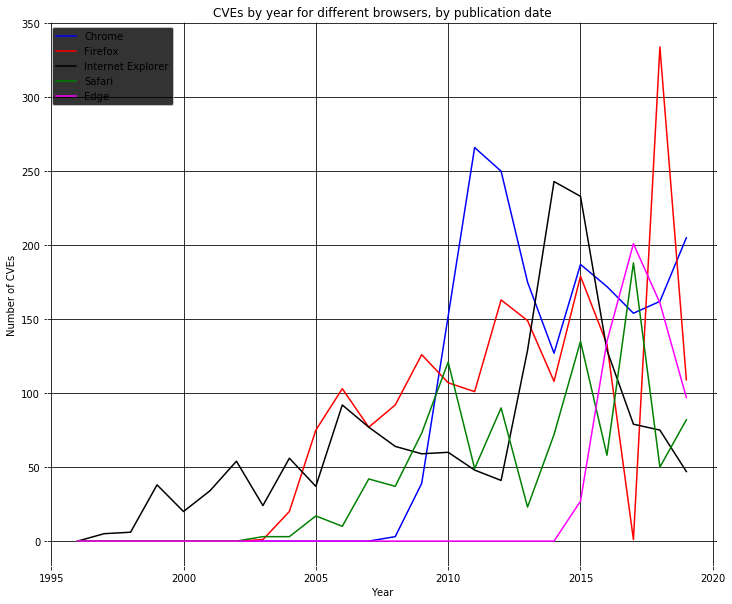

/usr/local/lib/python3.7/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#00000000',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
    

In [81]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B3600'
pyplot.rcParams['axes.facecolor'] = '#00000000'
COLOR = 'black'
pyplot.rcParams['text.color'] = COLOR
pyplot.rcParams['axes.labelcolor'] = COLOR
pyplot.rcParams['xtick.color'] = COLOR
pyplot.rcParams['ytick.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR
pyplot.rcParams['grid.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

pyplot.rcParams.keys()


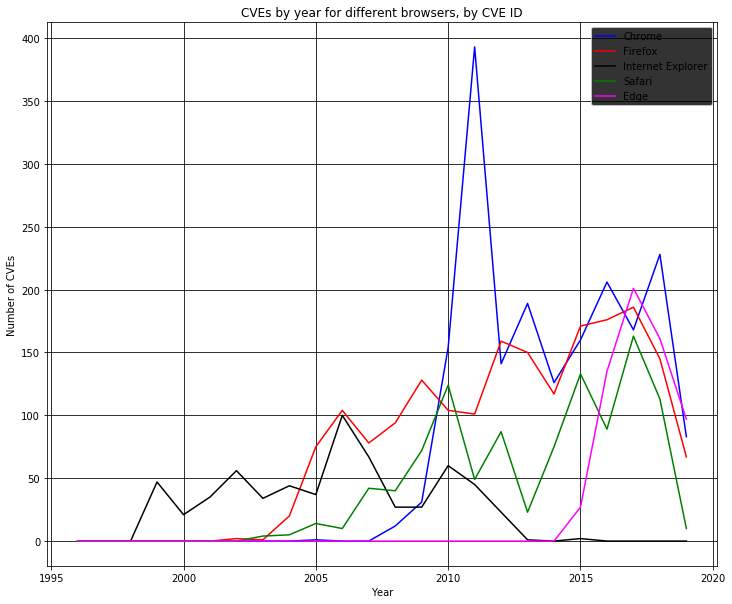

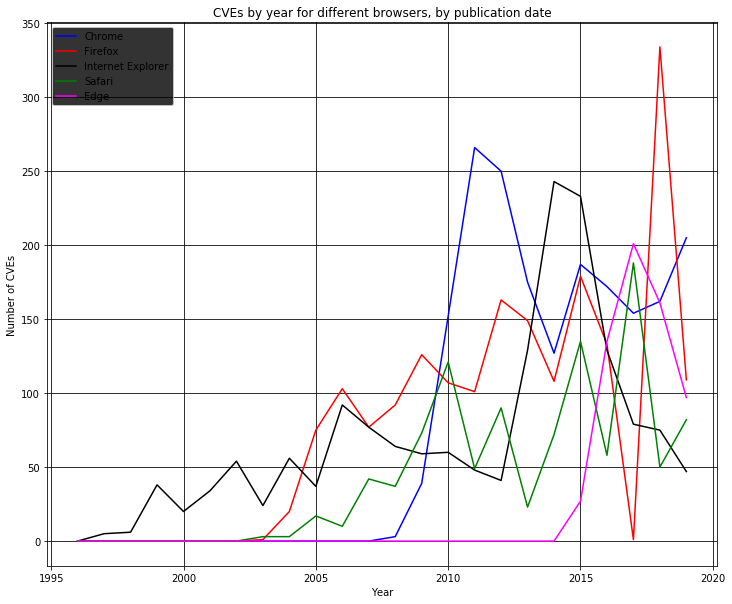

In [82]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B3600'
pyplot.rcParams['axes.facecolor'] = '#00000000'
COLOR = 'black'
pyplot.rcParams['text.color'] = COLOR
pyplot.rcParams['axes.labelcolor'] = COLOR
pyplot.rcParams['xtick.color'] = COLOR
pyplot.rcParams['ytick.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR
pyplot.rcParams['grid.color'] = COLOR
pyplot.rcParams['lines.color'] = COLOR
# pyplot.rcParams['figure.edgecolor'] = COLOR
pyplot.rcParams['axes.edgecolor'] = COLOR

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
pyplot.grid()
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

# pyplot.rcParams.keys()
